In [ ]:
!pip install nilearn

In [7]:
import numpy as np # linear algebra
import nilearn as nl
import nilearn.plotting as nlplt
import nibabel as nib
import h5py
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
mask_filename = 'input/fMRI_train/fMRI_mask.nii'
subject_filename = 'input/fMRI_train/10004.mat'
smri_filename = 'input/fMRI_train/ch2better.nii'
mask_niimg = nl.image.load_img(mask_filename)

def load_subject(filename, mask_niimg):
    """
    Load a subject saved in .mat format with
        the version 7.3 flag. Return the subject
        niimg, using a mask niimg as a template
        for nifti headers.
        
    Args:
        filename    <str>            the .mat filename for the subject data
        mask_niimg  niimg object     the mask niimg object used for nifti headers
    """
    subject_data = None
    with h5py.File(subject_filename, 'r') as f:
        subject_data = f['SM_feature'][()]
    # It's necessary to reorient the axes, since h5py flips axis order
    subject_data = np.moveaxis(subject_data, [0,1,2,3], [3,2,1,0])
    subject_niimg = nl.image.new_img_like(mask_niimg, subject_data, affine=mask_niimg.affine, copy_header=True)
    return subject_niimg
subject_niimg = load_subject(subject_filename, mask_niimg)
print("Image shape is %s" % (str(subject_niimg.shape)))
num_components = subject_niimg.shape[-1]
print("Detected {num_components} spatial maps".format(num_components=num_components))

Image shape is (53, 63, 52, 53)
Detected 53 spatial maps


/usr/local/lib/python3.6/dist-packages/nilearn/plotting/displays.py:99: UserWarning: linewidths is ignored by contourf
  **kwargs)
/usr/local/lib/python3.6/dist-packages/nilearn/plotting/displays.py:99: UserWarning: No contour levels were found within the data range.
  **kwargs)


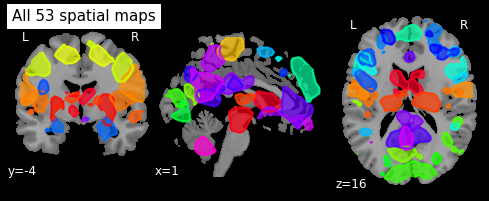

In [8]:
nlplt.plot_prob_atlas(subject_niimg, bg_img=smri_filename, view_type='filled_contours', draw_cross=False, title='All %d spatial maps' % num_components, threshold='auto')

In [9]:
grid_size = int(np.ceil(np.sqrt(num_components)))
fig, axes = plt.subplots(grid_size, grid_size, figsize=(grid_size*10, grid_size*10))
[axi.set_axis_off() for axi in axes.ravel()]
row = -1
for i, cur_img in enumerate(nl.image.iter_img(subject_niimg)):
    col = i % grid_size
    if col == 0:
        row += 1
    nlplt.plot_stat_map(cur_img, bg_img=smri_filename, title="IC %d" % i, axes=axes[row, col], threshold=3, colorbar=False)

Output hidden; open in https://colab.research.google.com to view.


Dataset created in /root/nilearn_data/haxby2001



 ...done. (2 seconds, 0 min)
 ...done. (0 seconds, 0 min)


Downloaded 278454272 of 291168628 bytes (95.6%,    0.1s remaining) ...done. (3 seconds, 0 min)
Extracting data from /root/nilearn_data/haxby2001/f33ff337e914bf7fded743c7107979f9/subj2-2010.01.14.tar.gz..... done.


First subject anatomical nifti image (3D) is at: /root/nilearn_data/haxby2001/subj2/anat.nii.gz
First subject functional nifti image (4D) is at: /root/nilearn_data/haxby2001/subj2/bold.nii.gz


/usr/local/lib/python3.6/dist-packages/nilearn/plotting/displays.py:1609: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  fraction * (x1 - x0), y1 - y0])
/usr/local/lib/python3.6/dist-packages/nilearn/plotting/displays.py:99: UserWarning: No contour levels were found within the data range.
  **kwargs)
/usr/local/lib/python3.6/dist-packages/nilearn/plotting/displays.py:99: UserWarning: The following kwargs were not used by contour: 'contours'
  **kwargs)


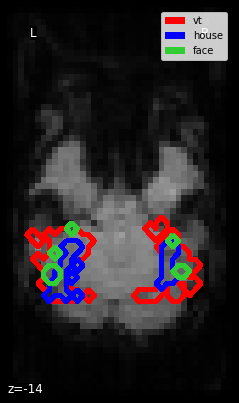

In [10]:
import matplotlib.pyplot as plt

from nilearn import datasets
haxby_dataset = datasets.fetch_haxby()   # load dataset

# print basic information on the dataset
print('First subject anatomical nifti image (3D) is at: %s' %
      haxby_dataset.anat[0])
print('First subject functional nifti image (4D) is at: %s' %
      haxby_dataset.func[0])  # 4D data

# Build the mean image because we have no anatomic data
from nilearn import image
func_filename = haxby_dataset.func[0]
mean_img = image.mean_img(func_filename)

z_slice = -14

fig = plt.figure(figsize=(4, 5.4), facecolor='k')

from nilearn.plotting import plot_anat, show
display = plot_anat(mean_img, display_mode='z', cut_coords=[z_slice],
                    figure=fig)
mask_vt_filename = haxby_dataset.mask_vt[0]
mask_house_filename = haxby_dataset.mask_house[0]
mask_face_filename = haxby_dataset.mask_face[0]
display.add_contours(mask_vt_filename, contours=1, antialiased=False,
                     linewidths=4., levels=[0], colors=['red'])
display.add_contours(mask_house_filename, contours=1, antialiased=False,
                     linewidths=4., levels=[0], colors=['blue'])
display.add_contours(mask_face_filename, contours=1, antialiased=False,
                     linewidths=4., levels=[0], colors=['limegreen'])

# We generate a legend using the trick described on
# http://matplotlib.sourceforge.net/users/legend_guide.httpml#using-proxy-artist
from matplotlib.patches import Rectangle
p_v = Rectangle((0, 0), 1, 1, fc="red")
p_h = Rectangle((0, 0), 1, 1, fc="blue")
p_f = Rectangle((0, 0), 1, 1, fc="limegreen")
plt.legend([p_v, p_h, p_f], ["vt", "house", "face"])

show()

In [11]:
from nilearn import datasets

# haxby dataset to have EPI images and masks
haxby_dataset = datasets.fetch_haxby()

# print basic information on the dataset
print('First subject anatomical nifti image (3D) is at: %s' %
      haxby_dataset.anat[0])
print('First subject functional nifti image (4D) is at: %s' %
      haxby_dataset.func[0])  # 4D data

haxby_anat_filename = haxby_dataset.anat[0]
haxby_mask_filename = haxby_dataset.mask_vt[0]
haxby_func_filename = haxby_dataset.func[0]

# one motor contrast map from NeuroVault
motor_images = datasets.fetch_neurovault_motor_task()
stat_img = motor_images.images[0]

First subject anatomical nifti image (3D) is at: /root/nilearn_data/haxby2001/subj2/anat.nii.gz
First subject functional nifti image (4D) is at: /root/nilearn_data/haxby2001/subj2/bold.nii.gz

Dataset created in /root/nilearn_data/neurovault



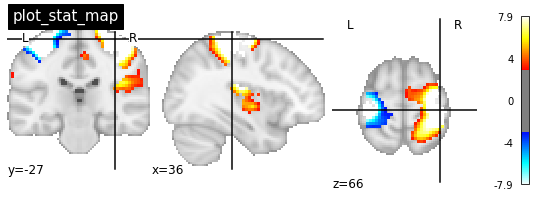

In [12]:
from nilearn import plotting

# Visualizing t-map image on EPI template with manual
# positioning of coordinates using cut_coords given as a list
plotting.plot_stat_map(stat_img,
                       threshold=3, title="plot_stat_map",
                       cut_coords=[36, -27, 66])


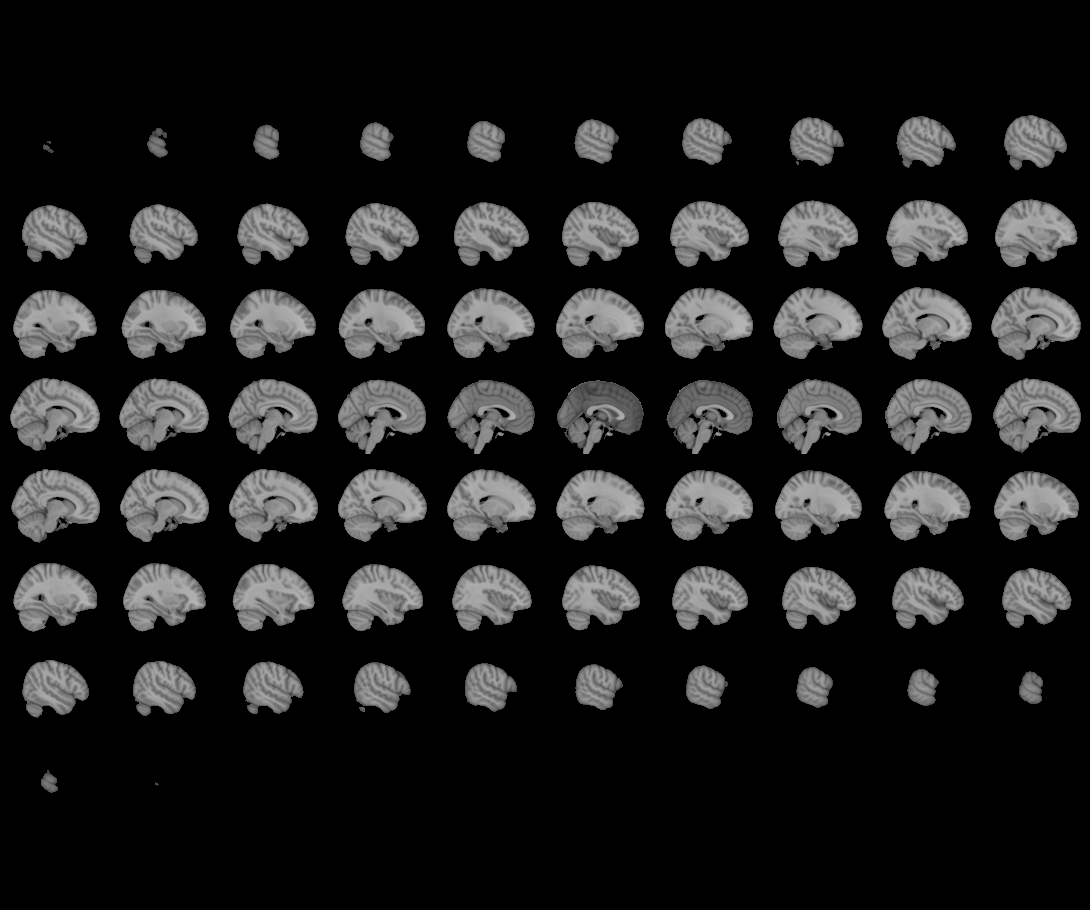
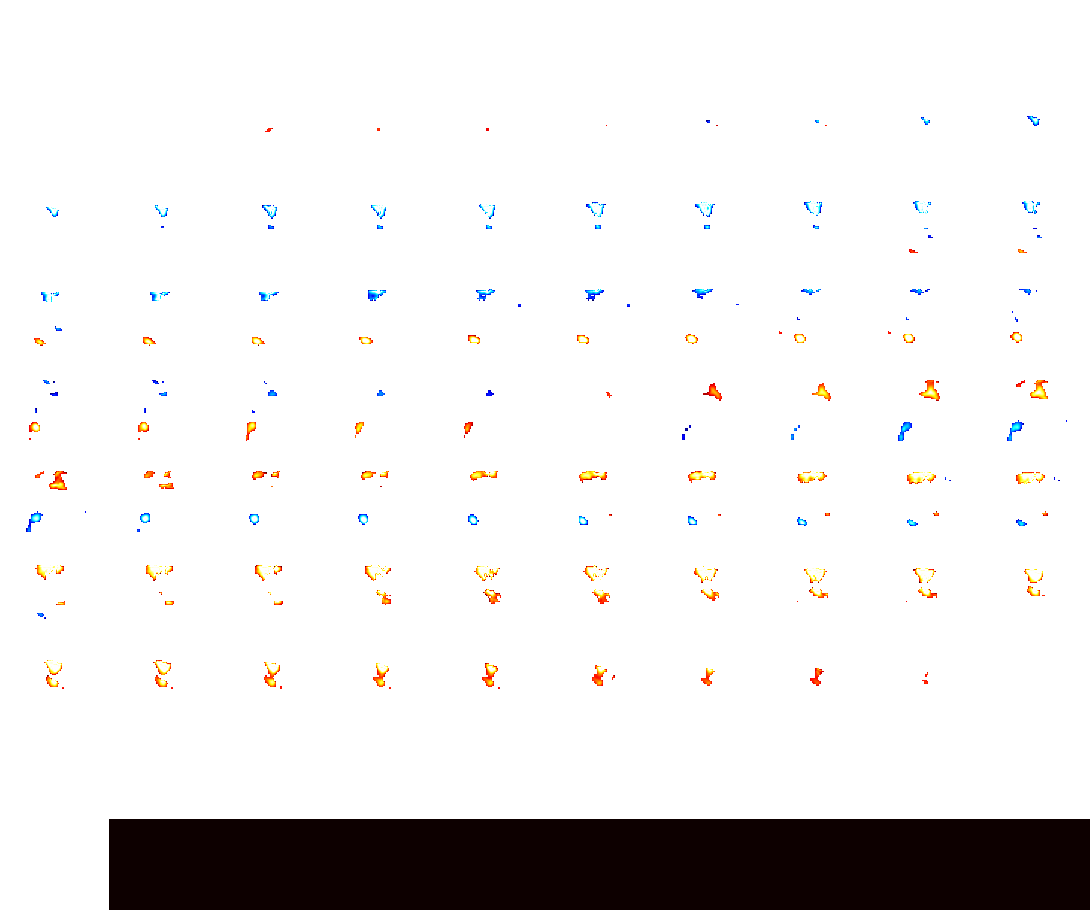

In [19]:
view = plotting.view_img(stat_img, threshold=3)
# In a Jupyter notebook, if ``view`` is the output of a cell, it will
# be displayed below the cell
view

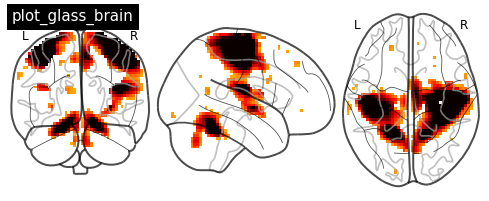

In [14]:
plotting.plot_glass_brain(stat_img, title='plot_glass_brain',
                          threshold=3)

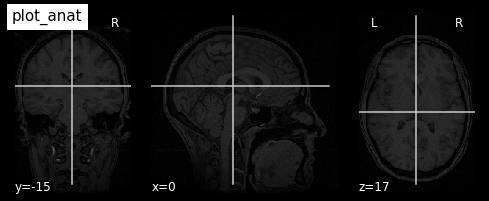

In [15]:
plotting.plot_anat(haxby_anat_filename, title="plot_anat")

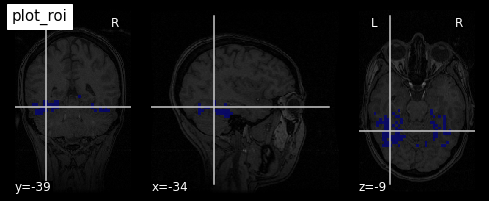

In [ ]:
plotting.plot_roi(haxby_mask_filename, bg_img=haxby_anat_filename,
                  title="plot_roi")

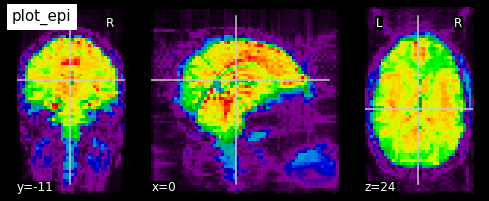

In [ ]:
# Import image processing tool
from nilearn import image

# Compute the voxel_wise mean of functional images across time.
# Basically reducing the functional image from 4D to 3D
mean_haxby_img = image.mean_img(haxby_func_filename)

# Visualizing mean image (3D)
plotting.plot_epi(mean_haxby_img, title="plot_epi")

In [ ]:
# haxby dataset to have anatomical image, EPI images and masks
#haxby_dataset = datasets.fetch_haxby()
haxby_anat_filename = haxby_dataset.anat[0]
haxby_mask_filename = haxby_dataset.mask_vt[0]
haxby_func_filename = haxby_dataset.func[0]

# localizer dataset to have contrast maps
motor_images = datasets.fetch_neurovault_motor_task()
stat_img = motor_images.images[0]

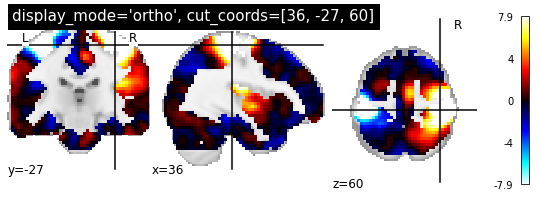

In [ ]:
plotting.plot_stat_map(stat_img, display_mode='ortho',
                       cut_coords=[36, -27, 60],
                       title="display_mode='ortho', cut_coords=[36, -27, 60]")

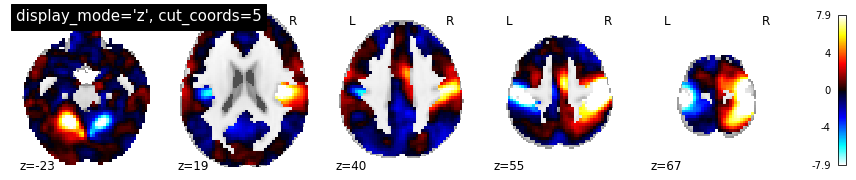

In [ ]:
plotting.plot_stat_map(stat_img, display_mode='z', cut_coords=5,
                       title="display_mode='z', cut_coords=5")

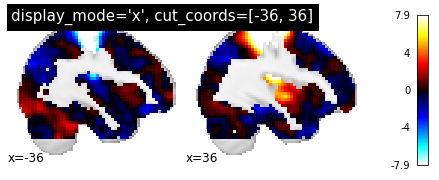

In [ ]:
plotting.plot_stat_map(stat_img, display_mode='x',
                       cut_coords=[-36, 36],
                       title="display_mode='x', cut_coords=[-36, 36]")

/usr/local/lib/python3.6/dist-packages/nilearn/plotting/displays.py:1609: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  fraction * (x1 - x0), y1 - y0])


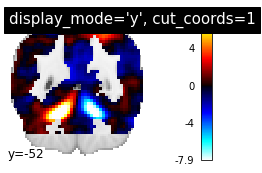

In [ ]:
plotting.plot_stat_map(stat_img, display_mode='y', cut_coords=1,
                       title="display_mode='y', cut_coords=1")

/usr/local/lib/python3.6/dist-packages/nilearn/plotting/displays.py:1609: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  fraction * (x1 - x0), y1 - y0])


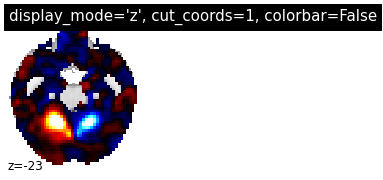

In [ ]:
plotting.plot_stat_map(stat_img, display_mode='z',
                       cut_coords=1, colorbar=False,
                       title="display_mode='z', cut_coords=1, colorbar=False")

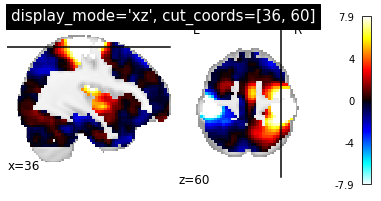

In [ ]:
plotting.plot_stat_map(stat_img, display_mode='xz',
                       cut_coords=[36, 60],
                       title="display_mode='xz', cut_coords=[36, 60]")

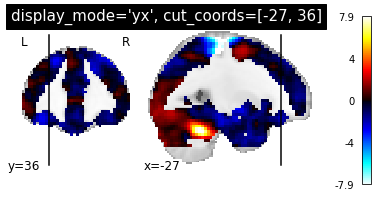

In [ ]:
plotting.plot_stat_map(stat_img, display_mode='yx',
                       cut_coords=[-27, 36],
                       title="display_mode='yx', cut_coords=[-27, 36]")

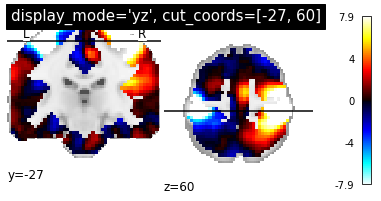

In [ ]:
plotting.plot_stat_map(stat_img, display_mode='yz',
                       cut_coords=[-27, 60],
                       title="display_mode='yz', cut_coords=[-27, 60]")

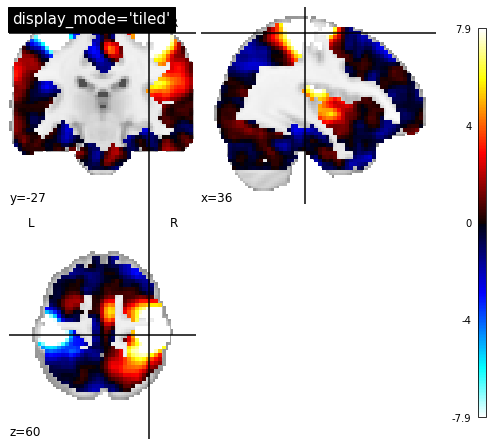

In [ ]:
plotting.plot_stat_map(stat_img, display_mode='tiled',
                       cut_coords=[36, -27, 60],
                       title="display_mode='tiled'")

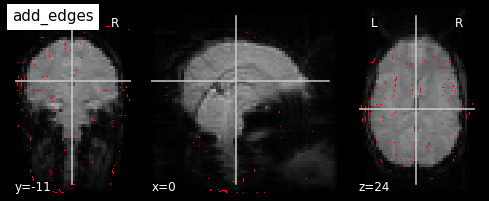

In [ ]:
display = plotting.plot_anat(mean_haxby_img, title="add_edges")

# We are now able to use add_edges method inherited in plotting object named as
# display. First argument - anatomical image  and by default edges will be
# displayed as red 'r', to choose different colors green 'g' and  blue 'b'.
display.add_edges(haxby_anat_filename)

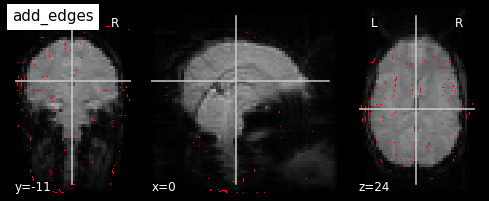

In [ ]:
display = plotting.plot_anat(mean_haxby_img, title="add_edges")

# We are now able to use add_edges method inherited in plotting object named as
# display. First argument - anatomical image  and by default edges will be
# displayed as red 'r', to choose different colors green 'g' and  blue 'b'.
display.add_edges(haxby_anat_filename)

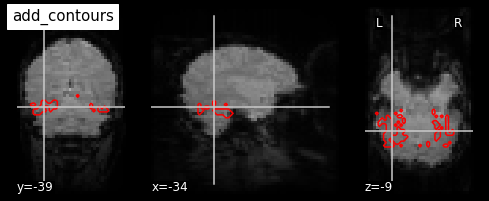

In [ ]:
# As seen before, we call the `plot_anat` function with a background image
# as first argument, in this case again the mean fMRI image and argument
# `cut_coords` as list for manual cut with coordinates pointing at masked
# brain regions
display = plotting.plot_anat(mean_haxby_img, title="add_contours",
                             cut_coords=[-34, -39, -9])
# Now use `add_contours` in display object with the path to a mask image from
# the Haxby dataset as first argument and argument `levels` given as list
# of values to select particular level in the contour to display and argument
# `colors` specified as red 'r' to see edges as red in color.
# See help on matplotlib.pyplot.contour to use more options with this method
display.add_contours(haxby_mask_filename, levels=[0.5], colors='r')

/usr/local/lib/python3.6/dist-packages/nilearn/plotting/displays.py:99: UserWarning: No contour levels were found within the data range.
  **kwargs)


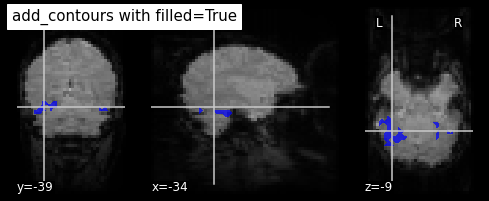

In [ ]:
display = plotting.plot_anat(mean_haxby_img,
                             title="add_contours with filled=True",
                             cut_coords=[-34, -39, -9])

# By default, no color fillings will be shown using `add_contours`. To see
# contours with color fillings use argument filled=True. contour colors are
# changed to blue 'b' with alpha=0.7 sets the transparency of color fillings.
# See help on matplotlib.pyplot.contourf to use more options given that filled
# should be True
display.add_contours(haxby_mask_filename, filled=True, alpha=0.7,
                     levels=[0.5], colors='b')

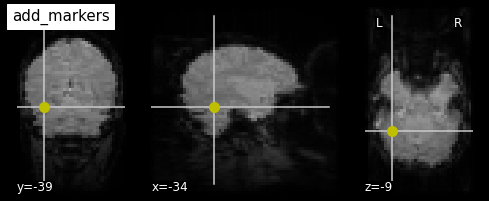

In [ ]:
display = plotting.plot_anat(mean_haxby_img, title="add_markers",
                             cut_coords=[-34, -39, -9])

# Coordinates of seed regions should be specified in first argument and second
# argument `marker_color` denotes color of the sphere in this case yellow 'y'
# and third argument `marker_size` denotes size of the sphere
coords = [(-34, -39, -9)]
display.add_markers(coords, marker_color='y', marker_size=100)

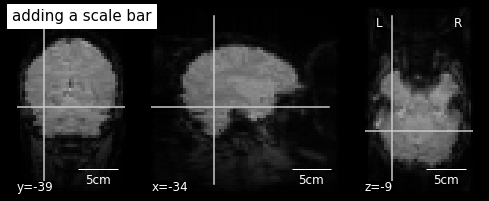

In [ ]:
display = plotting.plot_anat(mean_haxby_img,
                             title="adding a scale bar",
                             cut_coords=[-34, -39, -9])
display.annotate(scalebar=True)

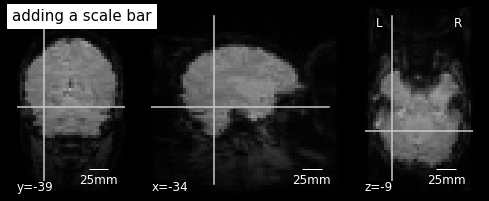

In [ ]:
display = plotting.plot_anat(mean_haxby_img,
                             title="adding a scale bar",
                             cut_coords=[-34, -39, -9])
display.annotate(scalebar=True, scale_size=25, scale_units='mm')

In [ ]:
from nilearn import datasets

rest_dataset = datasets.fetch_development_fmri(n_subjects=20)
func_filenames = rest_dataset.func
confounds = rest_dataset.confounds

/usr/local/lib/python3.6/dist-packages/nilearn/plotting/displays.py:99: UserWarning: linewidths is ignored by contourf
  **kwargs)
/usr/local/lib/python3.6/dist-packages/nilearn/plotting/displays.py:99: UserWarning: No contour levels were found within the data range.
  **kwargs)


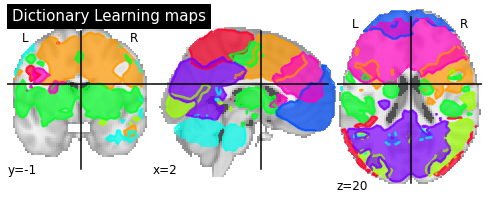

In [ ]:
# Import dictionary learning algorithm from decomposition module and call the
# object and fit the model to the functional datasets
from nilearn.decomposition import DictLearning

# Initialize DictLearning object
dict_learn = DictLearning(n_components=8, smoothing_fwhm=6.,
                          memory="nilearn_cache", memory_level=2,
                          random_state=0)
# Fit to the data
dict_learn.fit(func_filenames)
# Resting state networks/maps in attribute `components_img_`
# Note that this attribute is implemented from version 0.4.1.
# For older versions, see the note section above for details.
components_img = dict_learn.components_img_

# Visualization of functional networks
# Show networks using plotting utilities
from nilearn import plotting

plotting.plot_prob_atlas(components_img, view_type='filled_contours',
                         title='Dictionary Learning maps')

/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:2795: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)
/usr/local/lib/python3.6/dist-packages/nilearn/plotting/displays.py:99: UserWarning: No contour levels were found within the data range.
  **kwargs)
/usr/local/lib/python3.6/dist-packages/nilearn/plotting/displays.py:99: UserWarning: linewidths is ignored by contourf
  **kwargs)


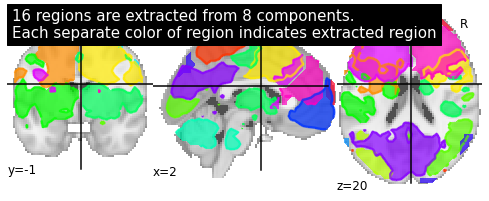

In [ ]:
# Import Region Extractor algorithm from regions module
# threshold=0.5 indicates that we keep nominal of amount nonzero voxels across all
# maps, less the threshold means that more intense non-voxels will be survived.
from nilearn.regions import RegionExtractor

extractor = RegionExtractor(components_img, threshold=0.5,
                            thresholding_strategy='ratio_n_voxels',
                            extractor='local_regions',
                            standardize=True, min_region_size=1350)
# Just call fit() to process for regions extraction
extractor.fit()
# Extracted regions are stored in regions_img_
regions_extracted_img = extractor.regions_img_
# Each region index is stored in index_
regions_index = extractor.index_
# Total number of regions extracted
n_regions_extracted = regions_extracted_img.shape[-1]

# Visualization of region extraction results
title = ('%d regions are extracted from %d components.'
         '\nEach separate color of region indicates extracted region'
         % (n_regions_extracted, 8))
plotting.plot_prob_atlas(regions_extracted_img, view_type='filled_contours',
                         title=title)

/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:2795: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)
/usr/local/lib/python3.6/dist-packages/nilearn/plotting/displays.py:99: UserWarning: No contour levels were found within the data range.
  **kwargs)
/usr/local/lib/python3.6/dist-packages/nilearn/plotting/displays.py:99: UserWarning: linewidths is ignored by contourf
  **kwargs)


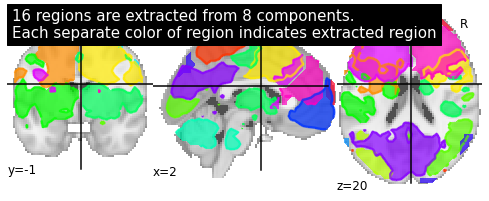

In [ ]:
# Import Region Extractor algorithm from regions module
# threshold=0.5 indicates that we keep nominal of amount nonzero voxels across all
# maps, less the threshold means that more intense non-voxels will be survived.
from nilearn.regions import RegionExtractor

extractor = RegionExtractor(components_img, threshold=0.5,
                            thresholding_strategy='ratio_n_voxels',
                            extractor='local_regions',
                            standardize=True, min_region_size=1350)
# Just call fit() to process for regions extraction
extractor.fit()
# Extracted regions are stored in regions_img_
regions_extracted_img = extractor.regions_img_
# Each region index is stored in index_
regions_index = extractor.index_
# Total number of regions extracted
n_regions_extracted = regions_extracted_img.shape[-1]

# Visualization of region extraction results
title = ('%d regions are extracted from %d components.'
         '\nEach separate color of region indicates extracted region'
         % (n_regions_extracted, 8))
plotting.plot_prob_atlas(regions_extracted_img, view_type='filled_contours',
                         title=title)

In [ ]:
# First we need to do subjects timeseries signals extraction and then estimating
# correlation matrices on those signals.
# To extract timeseries signals, we call transform() from RegionExtractor object
# onto each subject functional data stored in func_filenames.
# To estimate correlation matrices we import connectome utilities from nilearn
from nilearn.connectome import ConnectivityMeasure

correlations = []
# Initializing ConnectivityMeasure object with kind='correlation'
connectome_measure = ConnectivityMeasure(kind='correlation')
for filename, confound in zip(func_filenames, confounds):
    # call transform from RegionExtractor object to extract timeseries signals
    timeseries_each_subject = extractor.transform(filename, confounds=confound)
    # call fit_transform from ConnectivityMeasure object
    correlation = connectome_measure.fit_transform([timeseries_each_subject])
    # saving each subject correlation to correlations
    correlations.append(correlation)

# Mean of all correlations
import numpy as np
mean_correlations = np.mean(correlations, axis=0).reshape(n_regions_extracted,
                                                          n_regions_extracted)

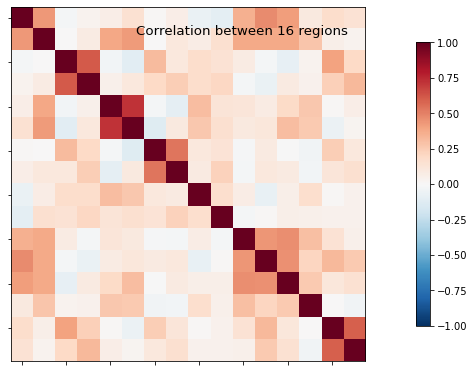

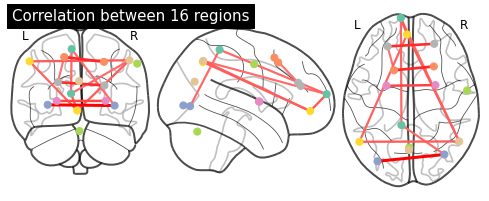

In [ ]:
title = 'Correlation between %d regions' % n_regions_extracted

# First plot the matrix
display = plotting.plot_matrix(mean_correlations, vmax=1, vmin=-1,
                               colorbar=True, title=title)

# Then find the center of the regions and plot a connectome
regions_img = regions_extracted_img
coords_connectome = plotting.find_probabilistic_atlas_cut_coords(regions_img)

plotting.plot_connectome(mean_correlations, coords_connectome,
                         edge_threshold='90%', title=title)

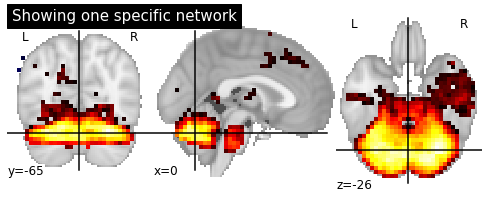

In [ ]:
# First, we plot a network of index=4 without region extraction (left plot)
from nilearn import image

img = image.index_img(components_img, 4)
coords = plotting.find_xyz_cut_coords(img)
display = plotting.plot_stat_map(img, cut_coords=coords, colorbar=False,
                                 title='Showing one specific network')

/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:2795: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)


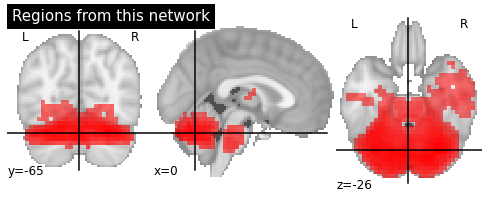

In [ ]:
# For this, we take the indices of the all regions extracted related to original
# network given as 4.
regions_indices_of_map3 = np.where(np.array(regions_index) == 4)

display = plotting.plot_anat(cut_coords=coords,
                             title='Regions from this network')

# Add as an overlay all the regions of index 4
colors = 'rgbcmyk'
for each_index_of_map3, color in zip(regions_indices_of_map3[0], colors):
    display.add_overlay(image.index_img(regions_extracted_img, each_index_of_map3),
                        cmap=plotting.cm.alpha_cmap(color))

plotting.show()

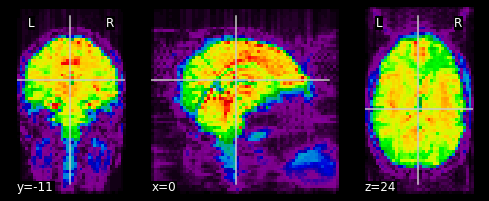

In [ ]:
from nilearn.image.image import mean_img

# Compute the mean EPI: we do the mean along the axis 3, which is time
func_filename = haxby_dataset.func[0]
mean_haxby = mean_img(func_filename)

from nilearn.plotting import plot_epi, show
plot_epi(mean_haxby)

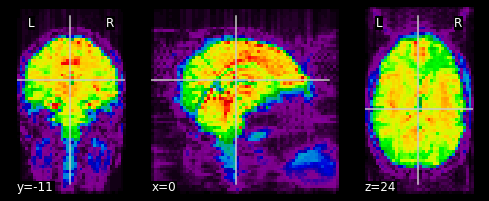

In [ ]:
from nilearn.image.image import mean_img

# Compute the mean EPI: we do the mean along the axis 3, which is time
func_filename = haxby_dataset.func[0]
mean_haxby = mean_img(func_filename)

from nilearn.plotting import plot_epi, show
plot_epi(mean_haxby)

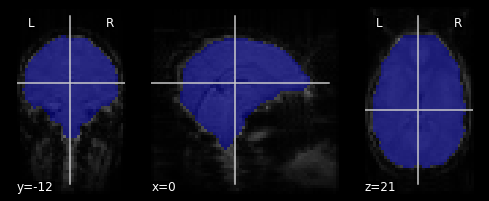

In [ ]:
from nilearn.masking import compute_epi_mask
mask_img = compute_epi_mask(func_filename)

# Visualize it as an ROI
from nilearn.plotting import plot_roi
plot_roi(mask_img, mean_haxby)

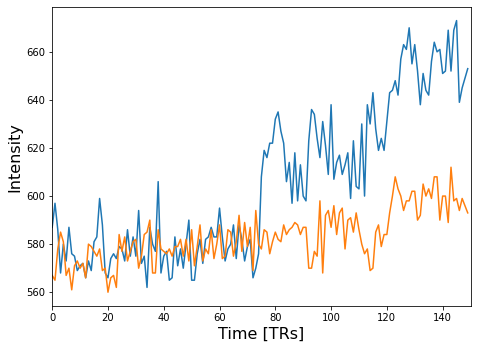

In [ ]:
from nilearn.masking import apply_mask
masked_data = apply_mask(func_filename, mask_img)

# masked_data shape is (timepoints, voxels). We can plot the first 150
# timepoints from two voxels

# And now plot a few of these
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 5))
plt.plot(masked_data[:150, :2])
plt.xlabel('Time [TRs]', fontsize=16)
plt.ylabel('Intensity', fontsize=16)
plt.xlim(0, 150)
plt.subplots_adjust(bottom=.12, top=.95, right=.95, left=.12)

show()

In [ ]:
from nilearn import datasets

motor_images = datasets.fetch_neurovault_motor_task()
stat_img = motor_images.images[0]

In [ ]:
fsaverage = datasets.fetch_surf_fsaverage()

In [ ]:
from nilearn import surface

texture = surface.vol_to_surf(stat_img, fsaverage.pial_right)

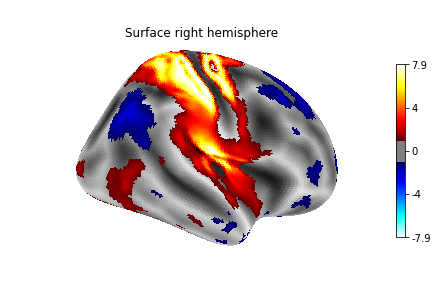

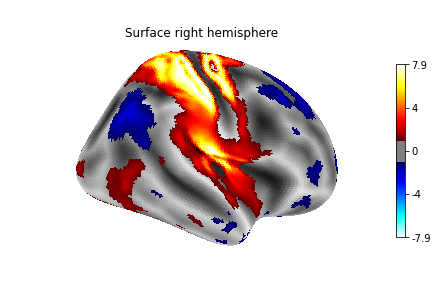

In [ ]:
from nilearn import plotting

plotting.plot_surf_stat_map(fsaverage.infl_right, texture, hemi='right',
                            title='Surface right hemisphere', colorbar=True,
                            threshold=1., bg_map=fsaverage.sulc_right)

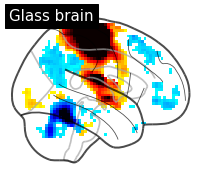

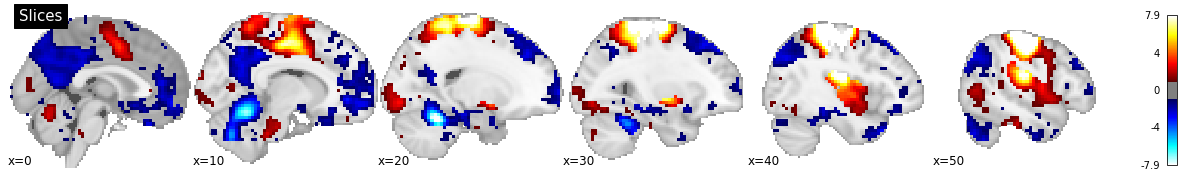

In [ ]:
plotting.plot_glass_brain(stat_img, display_mode='r', plot_abs=False,
                          title='Glass brain', threshold=2.)

plotting.plot_stat_map(stat_img, display_mode='x', threshold=1.,
                       cut_coords=range(0, 51, 10), title='Slices')


Dataset created in /root/nilearn_data/fsaverage



Downloaded 12115968 of 20299811 bytes (59.7%,    1.4s remaining) ...done. (3 seconds, 0 min)
Extracting data from /root/nilearn_data/fsaverage/b31b4babc90f401f4c2a5107939be333/fsaverage.tar.gz..... done.


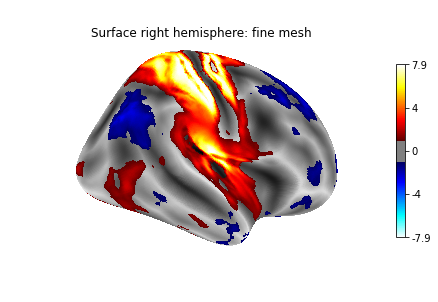

In [ ]:
big_fsaverage = datasets.fetch_surf_fsaverage('fsaverage')
big_texture = surface.vol_to_surf(stat_img, big_fsaverage.pial_right)

plotting.plot_surf_stat_map(big_fsaverage.infl_right,
                            big_texture, hemi='right', colorbar=True,
                            title='Surface right hemisphere: fine mesh',
                            threshold=1., bg_map=big_fsaverage.sulc_right)


plotting.show()

In [ ]:
view = plotting.view_surf(fsaverage.infl_right, texture, threshold='90%',
                          bg_map=fsaverage.sulc_right)

# In a Jupyter notebook, if ``view`` is the output of a cell, it will
# be displayed below the cell
view

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
view = plotting.view_img_on_surf(stat_img, threshold='90%')
# view.open_in_browser()

view

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from nilearn import datasets
print('Datasets are stored in: %r' % datasets.get_data_dirs())

Datasets are stored in: ['/root/nilearn_data']


In [ ]:
motor_images = datasets.fetch_neurovault_motor_task()
motor_images.images

['/root/nilearn_data/neurovault/collection_658/image_10426.nii.gz']

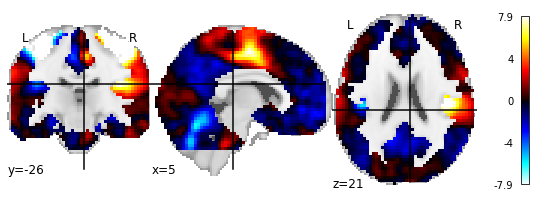

In [ ]:
tmap_filename = motor_images.images[0]

from nilearn import plotting
plotting.plot_stat_map(tmap_filename)